In [8]:
# Data Analysis and visualization tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('online_shoppers_intention.csv')

training_data, testing_data =train_test_split(df, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 9864
No. of testing examples: 2466


In [9]:
training_data.shape

(9864, 18)

In [10]:
training_data.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5046,0,0.000000,0,0.000000,5,626.000000,0.000000,0.040000,0.000000,0.0,May,1,1,1,4,Returning_Visitor,False,False
5160,0,0.000000,0,0.000000,8,254.000000,0.000000,0.037500,0.000000,0.4,May,2,2,4,13,Returning_Visitor,False,False
8838,0,0.000000,0,0.000000,32,1297.750000,0.000000,0.007500,42.622745,0.0,Nov,2,2,3,7,Returning_Visitor,False,True
771,0,0.000000,0,0.000000,11,1390.166667,0.012121,0.014545,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,True,False
4332,4,160.583333,1,136.750000,21,1632.733333,0.000000,0.004545,16.539091,0.0,May,2,2,4,2,New_Visitor,True,False
4502,4,64.500000,0,0.000000,28,852.333333,0.013793,0.024548,0.000000,0.0,May,2,2,1,7,Returning_Visitor,True,False
2241,0,0.000000,0,0.000000,30,986.500000,0.006667,0.023333,0.000000,0.0,May,2,4,3,3,Returning_Visitor,False,False
3821,2,21.333333,0,0.000000,3,45.333333,0.000000,0.012500,0.000000,0.0,May,3,2,4,4,Returning_Visitor,True,False
5509,6,545.650000,3,204.346667,69,1182.432333,0.000685,0.002998,19.715295,0.0,Nov,2,2,1,13,Returning_Visitor,True,True
6465,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,Oct,1,1,1,1,New_Visitor,True,False


In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9864 entries, 5046 to 8510
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType          

In [12]:
training_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,2.321776,81.473587,0.499696,32.679629,31.698195,1192.007183,0.022173,0.043019,5.865531,0.060503,2.126419,2.363341,3.150243,4.103305
std,3.327241,175.439246,1.269360,134.386880,44.517382,1860.396046,0.048387,0.048456,18.285396,0.197637,0.922274,1.738501,2.416429,4.062446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.364583,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.050000,0.003125,0.025321,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.825000,0.000000,0.000000,38.000000,1461.987500,0.017110,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,2657.318056,24.000000,2256.916667,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
training_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    training_data[c1]= label_encoder.fit_transform(training_data[c1])
 
    training_data[c1].unique()
    return training_data

In [15]:
LABEL_ENCODING('Revenue')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5046,0,0.000000,0,0.00,5,626.000000,0.000000,0.040000,0.000000,0.0,May,1,1,1,4,Returning_Visitor,False,0
5160,0,0.000000,0,0.00,8,254.000000,0.000000,0.037500,0.000000,0.4,May,2,2,4,13,Returning_Visitor,False,0
8838,0,0.000000,0,0.00,32,1297.750000,0.000000,0.007500,42.622745,0.0,Nov,2,2,3,7,Returning_Visitor,False,1
771,0,0.000000,0,0.00,11,1390.166667,0.012121,0.014545,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,True,0
4332,4,160.583333,1,136.75,21,1632.733333,0.000000,0.004545,16.539091,0.0,May,2,2,4,2,New_Visitor,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,0,0.000000,2,386.00,36,1609.939744,0.000000,0.009323,12.503257,0.0,Nov,2,2,3,3,Returning_Visitor,False,1
2934,4,35.666667,2,9.00,43,2797.816667,0.000000,0.006667,0.000000,0.0,May,2,2,7,2,Returning_Visitor,True,0
10383,3,53.000000,5,9.50,218,8205.687940,0.023570,0.039664,1.180737,0.0,Nov,1,1,3,3,Returning_Visitor,False,1
6618,2,140.166667,4,244.30,14,307.443506,0.044444,0.067398,0.000000,0.0,Sep,3,2,1,1,Returning_Visitor,False,0


In [16]:
training_data = pd.get_dummies(df, columns = ['Month', 'Weekend','VisitorType'])

In [17]:
training_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekend_False,Weekend_True,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,1,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,1,0,0,0,1,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,1,0,0,0,1,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,1,0,0,1,0,0,0,1


Text(0.5, 1.0, 'Pruchase Decision')

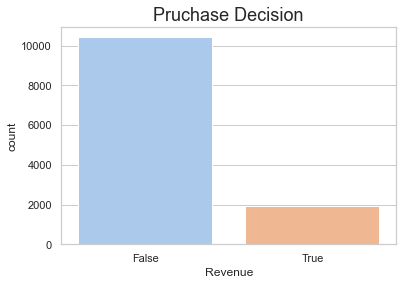

In [18]:
sns.set_theme(style="whitegrid")
sns.countplot(training_data['Revenue'],palette='pastel')
plt.title('Pruchase Decision', fontsize = 18)                  

Text(0.5, 1.0, 'Page Values vs Revenue')

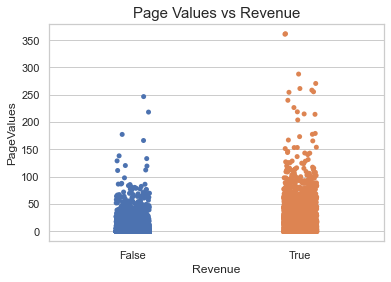

In [19]:
sns.stripplot(data=training_data, x="Revenue", y="PageValues")
plt.title('Page Values vs Revenue', fontsize = 15)

Text(0.5, 1.0, 'Page Values vs Bounce Rates')

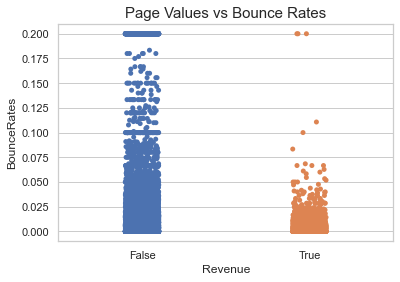

In [20]:
sns.stripplot(data=training_data, x="Revenue", y="BounceRates")
plt.title('Page Values vs Bounce Rates', fontsize = 15)

Shape of the dataset:  (12330, 2)


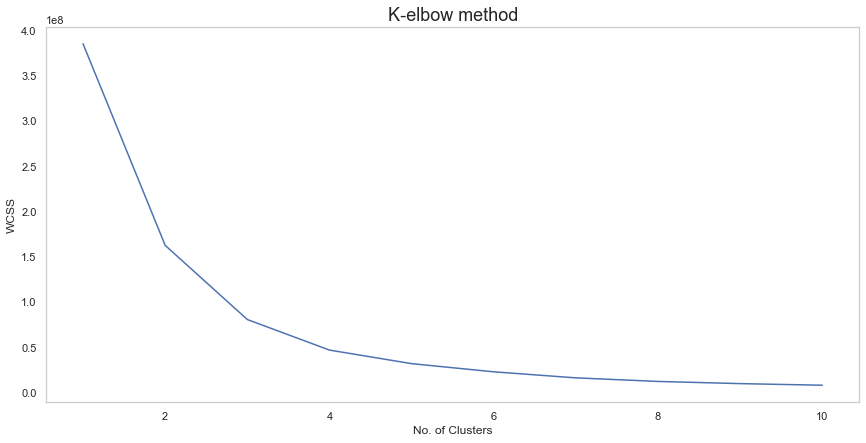

In [21]:
x = training_data.iloc[:, [1, 6]].values

print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 180,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('K-elbow method', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

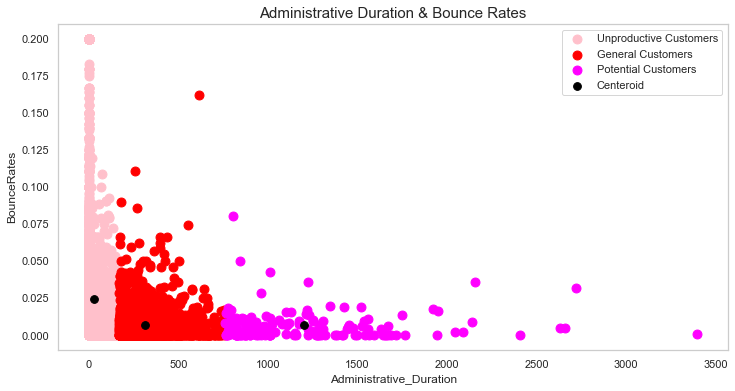

In [22]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 180, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 80, c = 'pink', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 80, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 80, c = 'magenta', label = 'Potential Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centeroid')

plt.title('Administrative Duration & Bounce Rates', fontsize = 15)
plt.grid()
plt.xlabel('Administrative_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

Shape of the dataset:  (12330, 2)


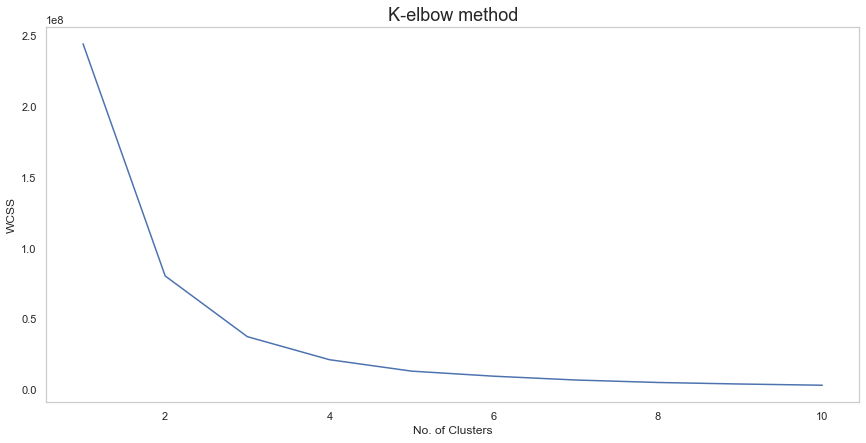

In [23]:
x = training_data.iloc[:, [3, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 180,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('K-elbow method', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

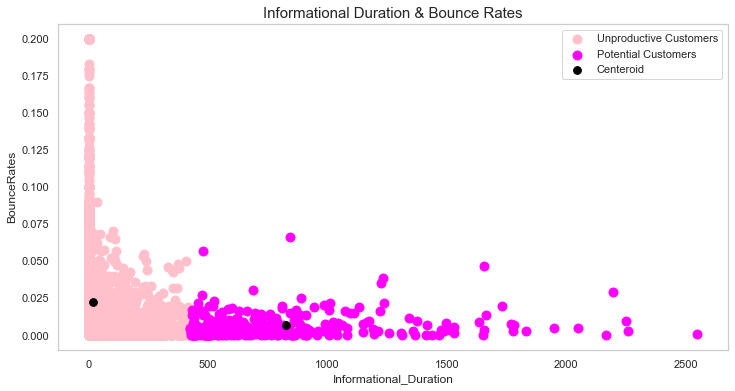

In [24]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 180, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 80, c = 'pink', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 80, c = 'magenta', label = 'Potential Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centeroid')

plt.title('Informational Duration & Bounce Rates', fontsize = 15)
plt.grid()
plt.xlabel('Informational_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

Shape of the dataset:  (12330, 2)


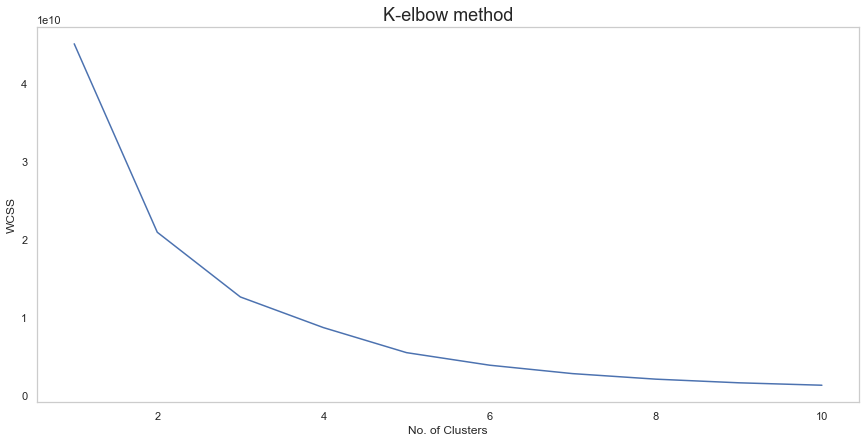

In [25]:
x = training_data.iloc[:, [5, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 180,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('K-elbow method', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

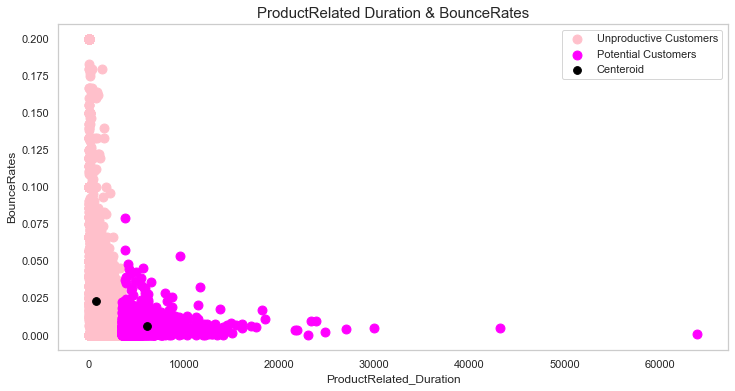

In [21]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 180, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 80, c = 'pink', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 80, c = 'magenta', label = 'Potential Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centeroid')

plt.title('ProductRelated Duration & BounceRates', fontsize = 15)
plt.grid()
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

Shape of the dataset:  (12330, 2)


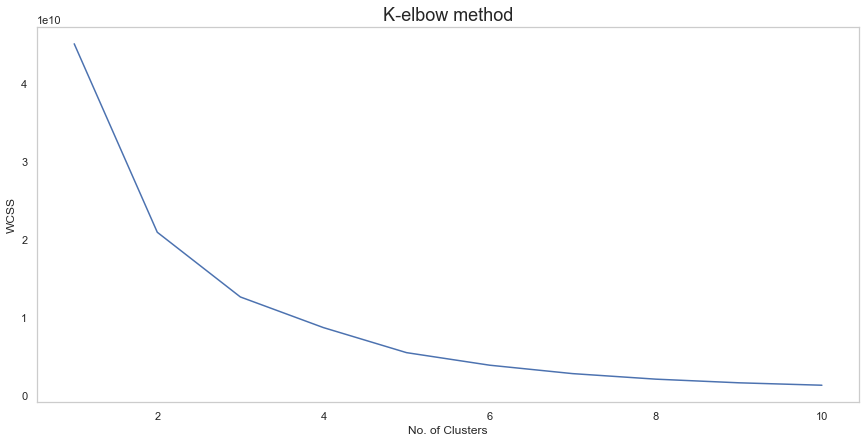

In [26]:
x = training_data.iloc[:, [5, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 180,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('K-elbow method', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

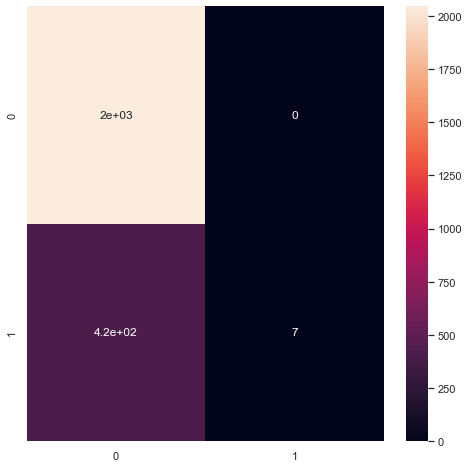

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True)
plt.show()

In [33]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.83      1.00      0.91      2044
        True       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



In [34]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Adjusted rand index: 
0.08359442469281096


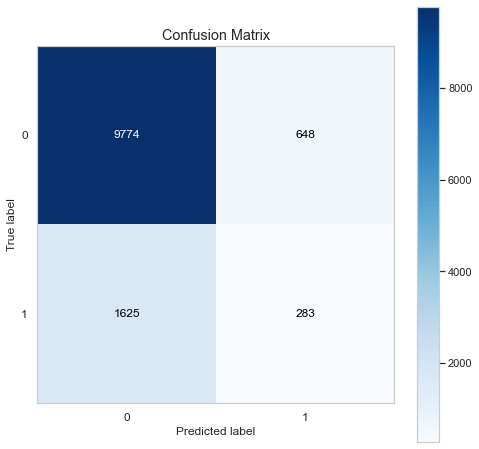

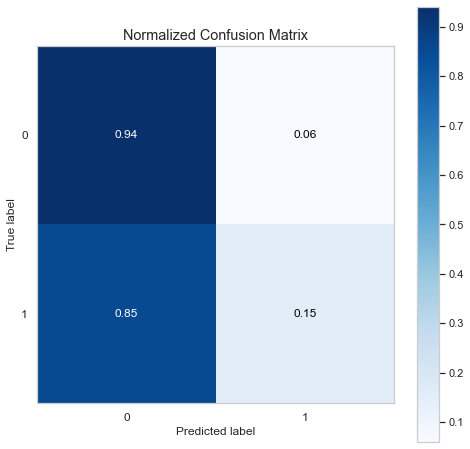

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(df['Revenue'])

# get predicted clustering result label
labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

In [32]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2044
           1       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466

